In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
data = pd.read_csv("C:\\Users\\Moham\\Desktop\\heart.csv")

In [11]:
data.info() #showing the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
data.dtypes #showing the type of data

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [14]:
data.isnull() # finding the missing data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


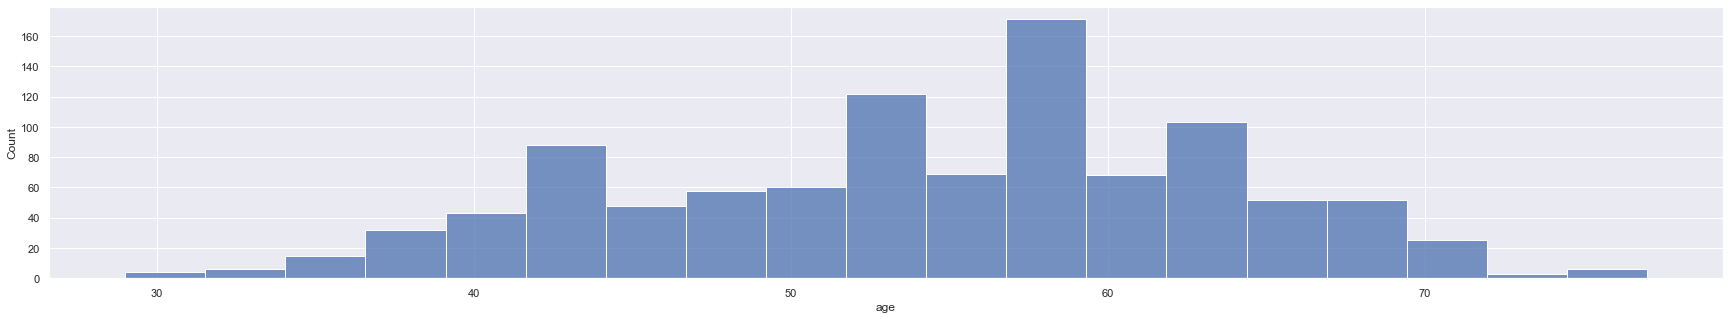

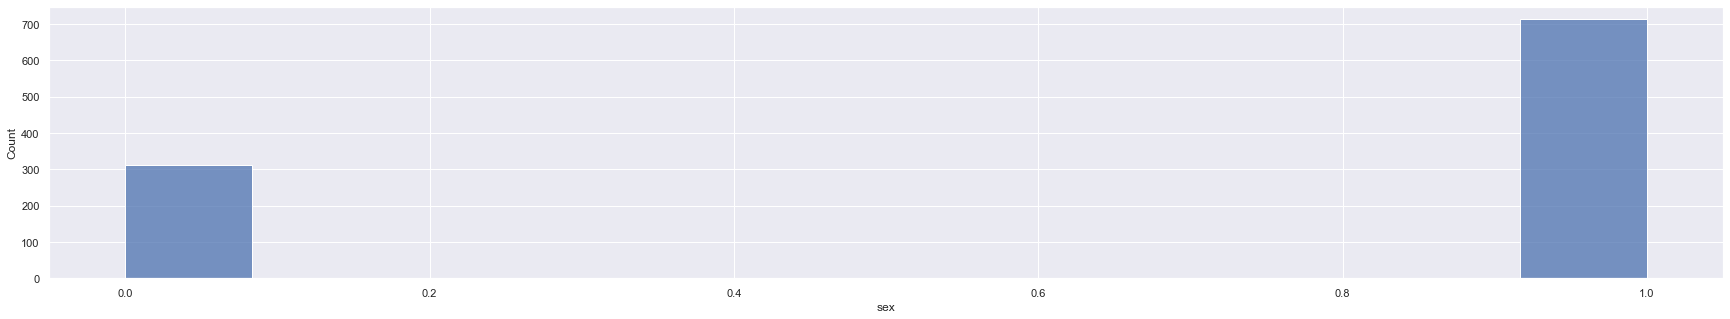

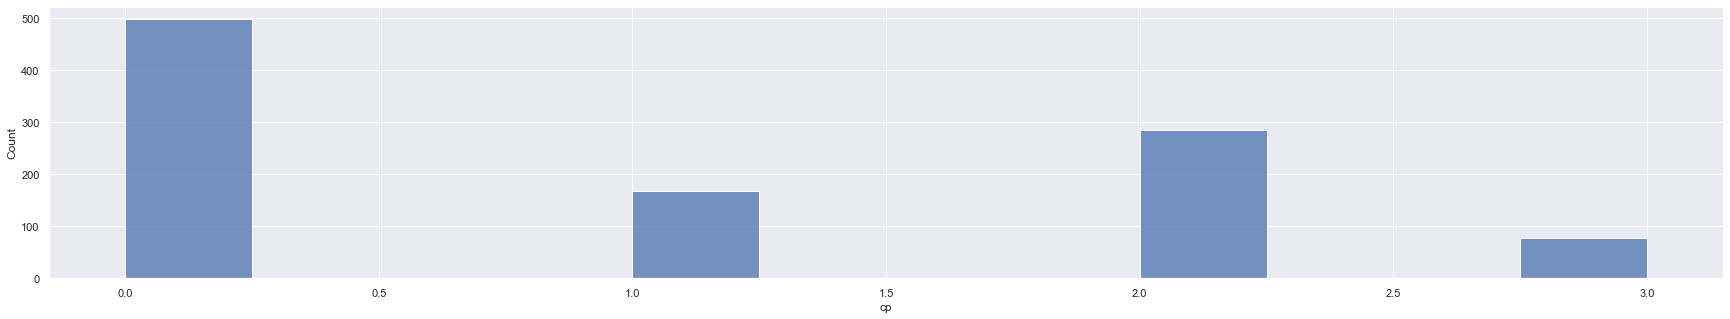

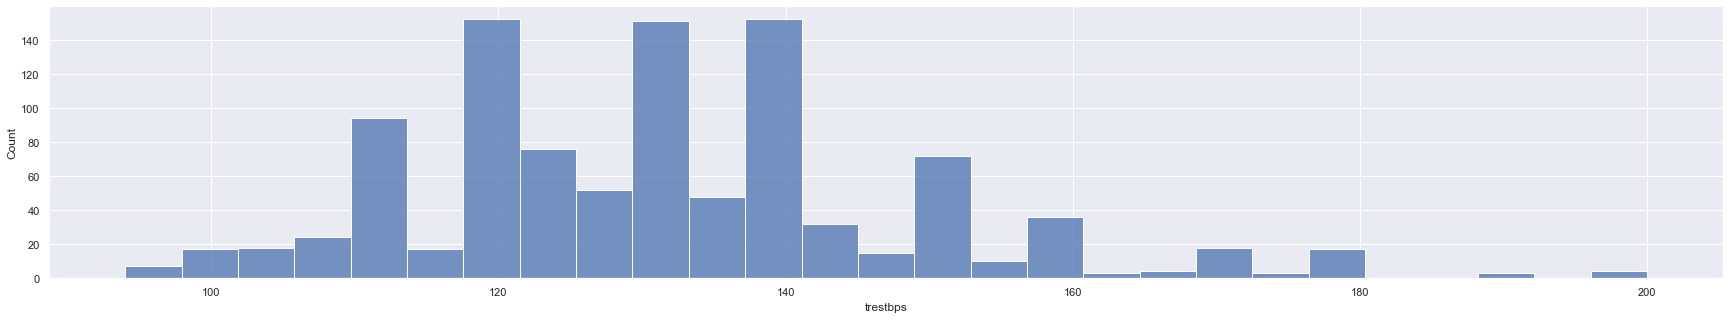

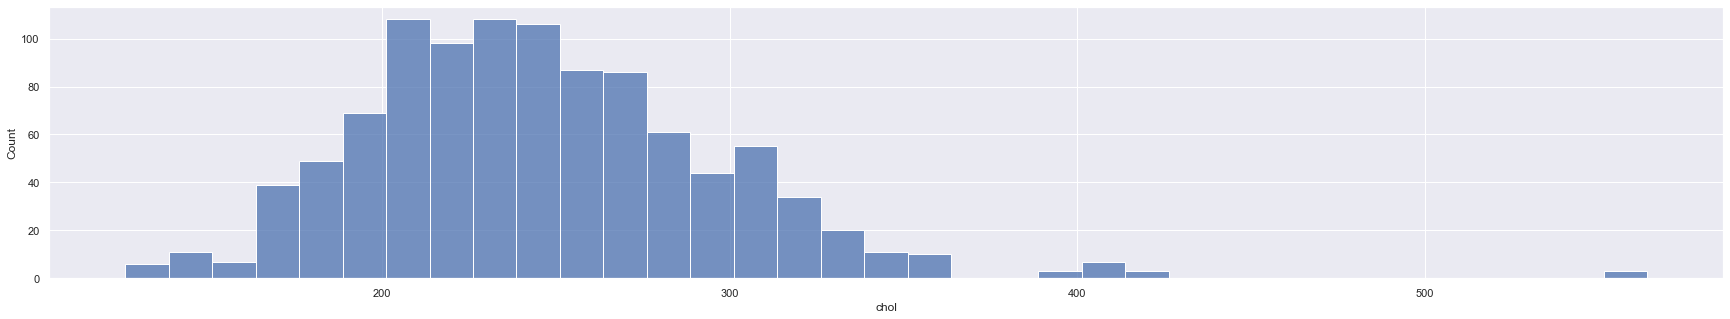

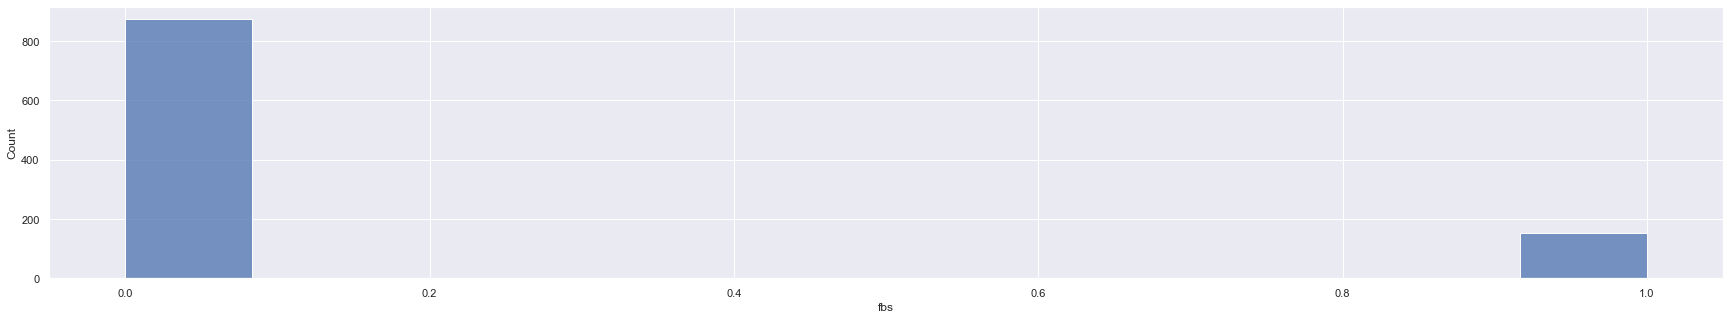

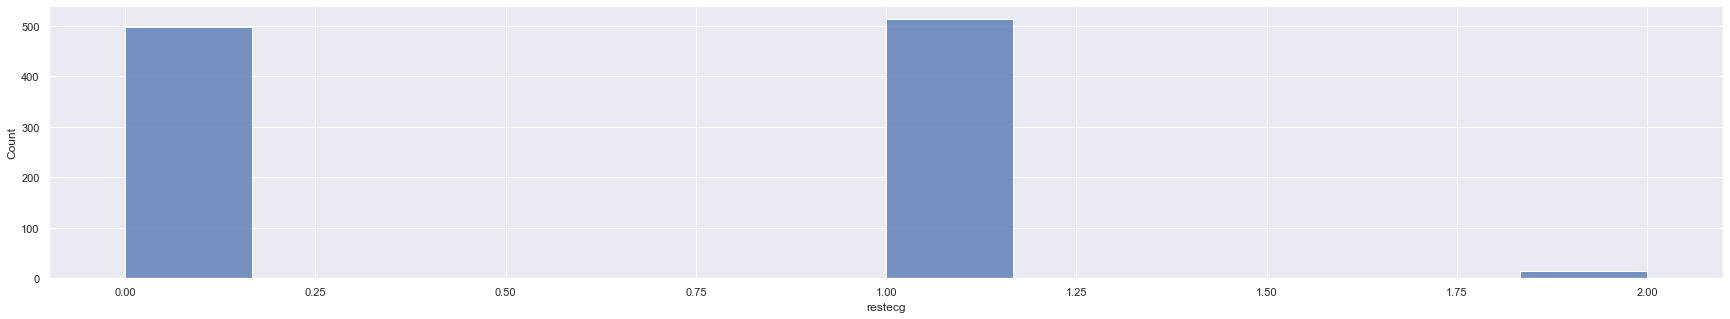

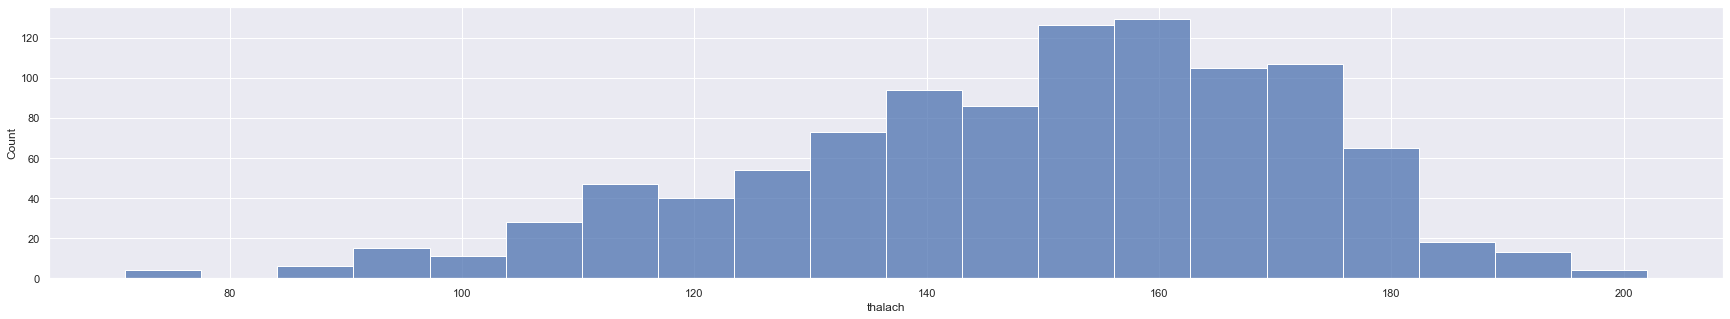

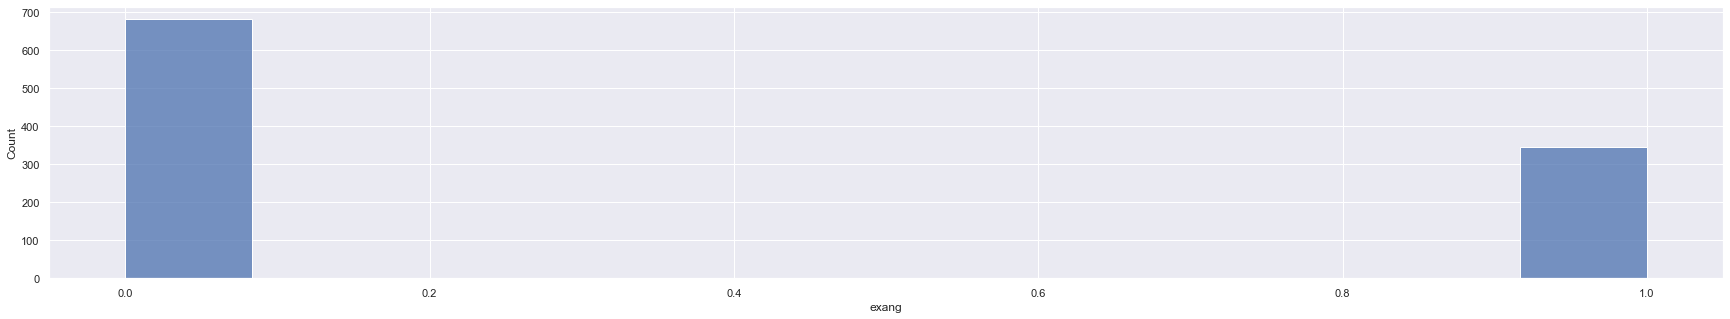

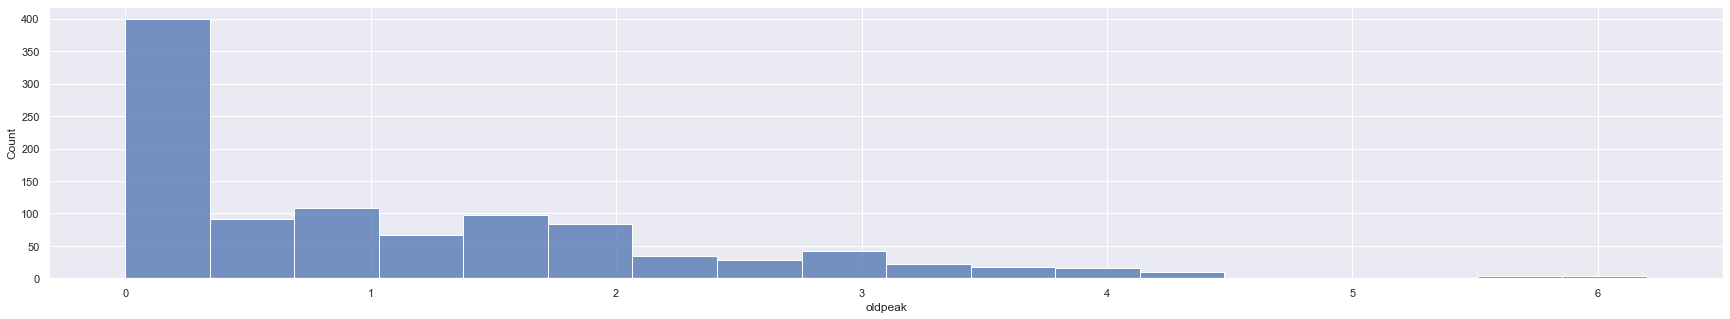

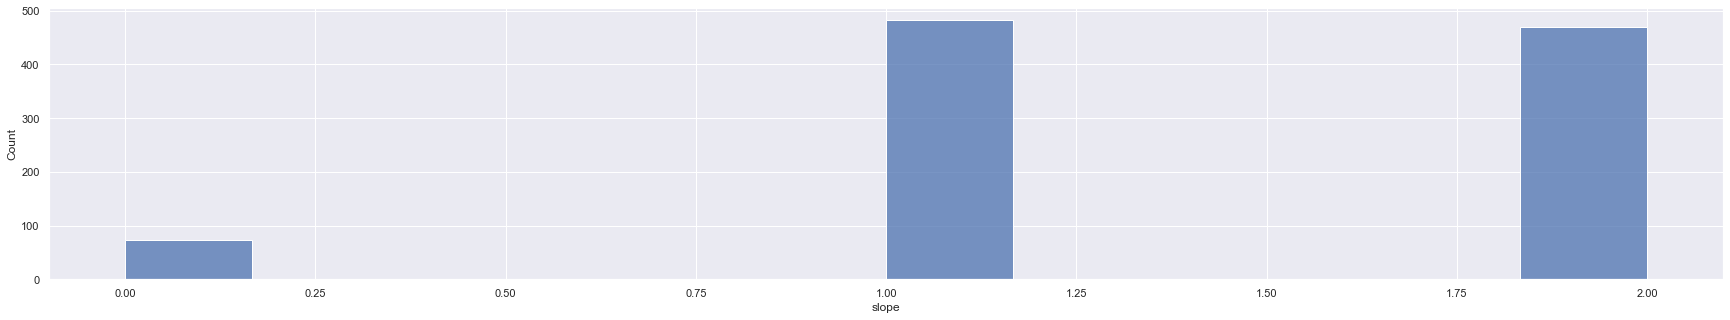

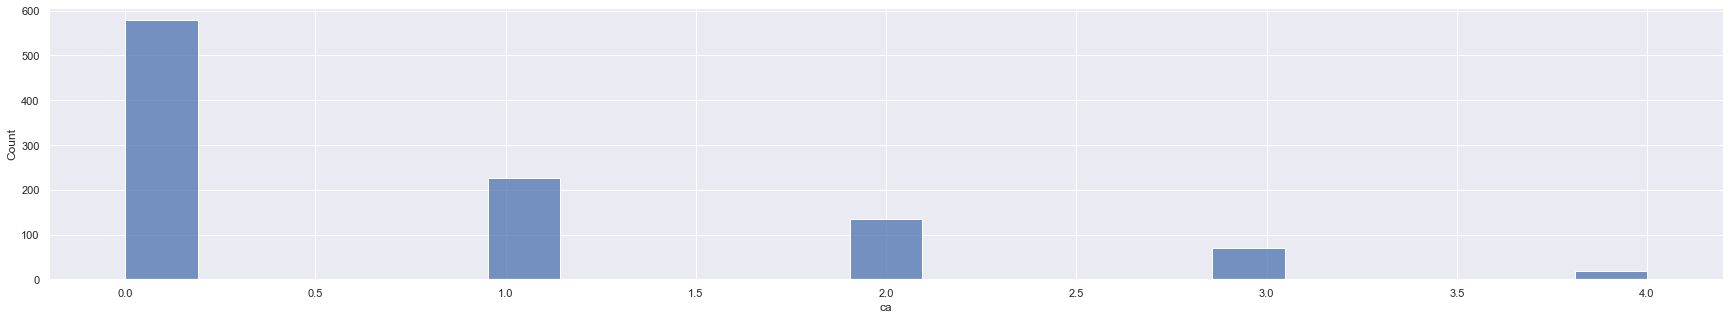

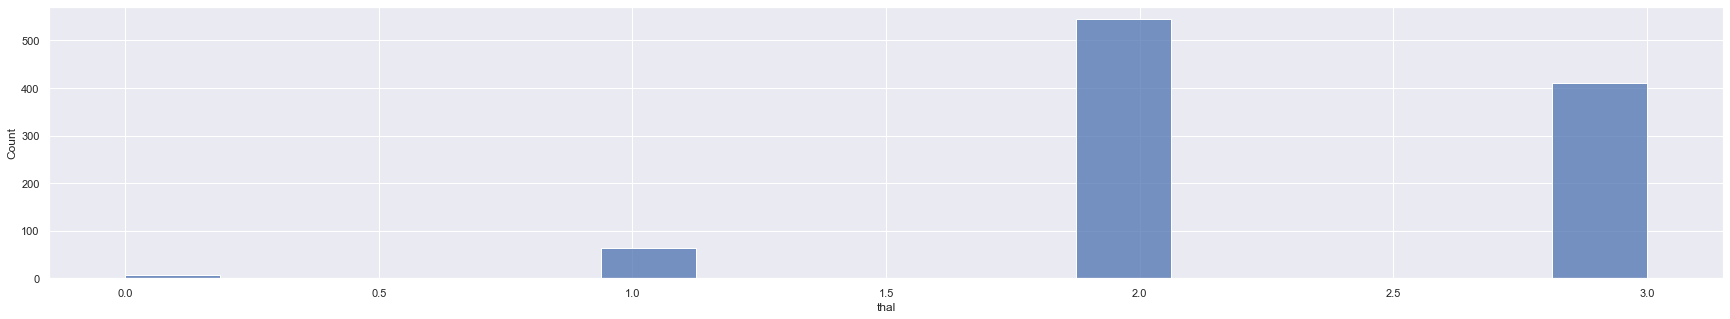

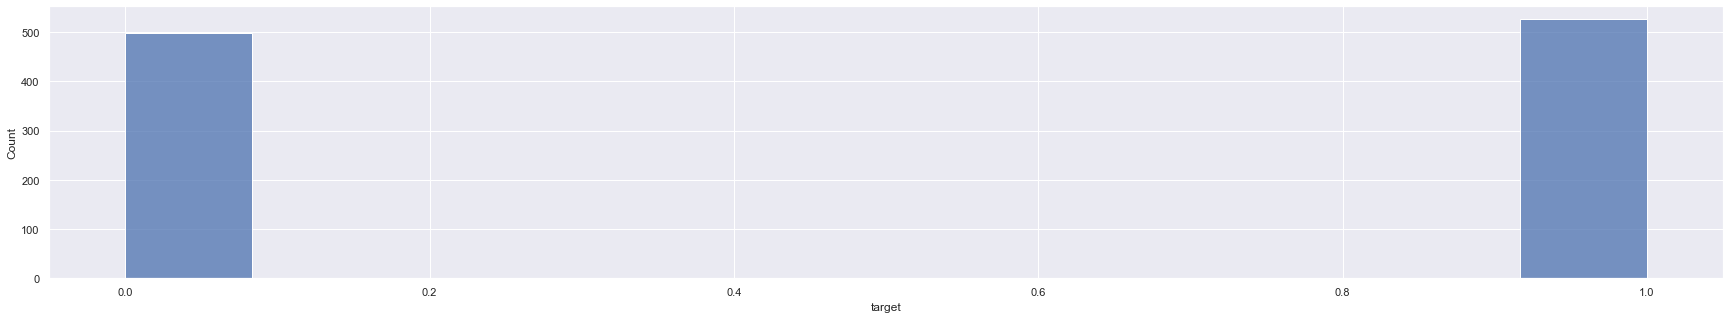

In [15]:
# plt.figure to show that how much features have (1,0,-1)
for columns in data.columns:
    plt.figure(figsize=(30,5))
    sns.histplot(data[columns])
    plt.show()

<AxesSubplot:>

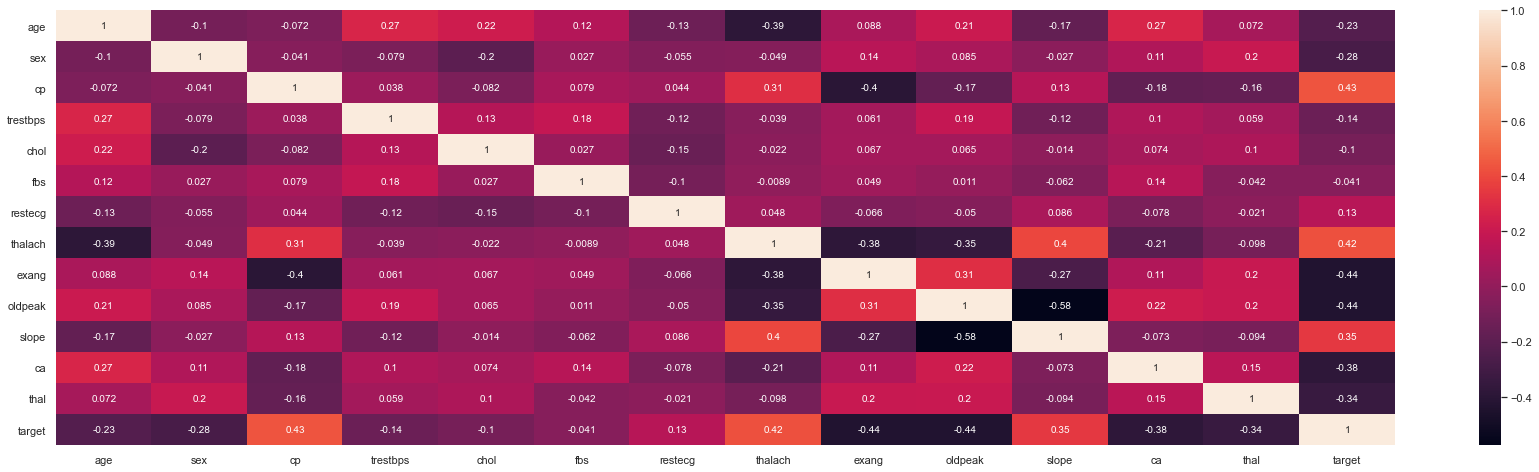

In [21]:
# plt.figure to show that how much features have (1,0,-1)
plt.figure(figsize=(30,8))
sns.heatmap(data.corr(),annot=True)

# Bulding the model 

In [16]:
x = data.drop(columns = ["target"])
y = data["target"]

In [17]:
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler()
x_scaled = x_scaled.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1234)

# KNN 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
kn_accuracy = accuracy_score(y_test,y_pred)
print(kn_accuracy)
print(classification_report(y_test,y_pred))

0.8780487804878049
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       101
           1       0.85      0.92      0.88       104

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



## accuracy_score is 87

# SVM

In [20]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
sv_accuracy = accuracy_score(y_test,y_pred)
print(sv_accuracy)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print(classification_report(y_test,y_pred))

0.9170731707317074
[[89 12]
 [ 5 99]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       101
           1       0.89      0.95      0.92       104

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



## accuracy_score is 91